**Group Members**: Ahadul Islam, Fahim Hossain, Gozde Birgun, Rula Suaifan

**Definition of the Business Problem**

The business problem we've identified revolves around the **frequent job changes by members of our company's data science team**, attributed to **non-competitive salaries**. This issue directly impacts the Human Resources (HR) department, tasked with managing employee retention and satisfaction, and the data science team, which faces disruption and diminished morale due to high turnover rates. Indirectly, the problem affects the entire organization by impeding the ability to sustain a stable and efficient team dedicated to leveraging data for strategic decisions and innovation. The continuity of projects and the accumulation of specialized knowledge are at risk, leading to potential delays in reaching key business objectives and a decrease in the overall competitive edge of the company.

From a financial perspective, the solution to offer competitive salaries to the data science team, though initially increasing the operational expenditure, is poised to generate long-term savings. By reducing the turnover rates, the company can significantly lower the recurring costs associated with recruiting and training new employees, alongside mitigating the risks of project delays and loss of proprietary knowledge and expertise. Socially, adjusting salary structures to meet or exceed market standards enhances the company's reputation as an attractive and fair employer. This not only aids in attracting a broader and more diverse talent pool but also boosts internal morale and job satisfaction among current employees. A competitive salary package reflects the company’s acknowledgment of the value and contributions of its data science team. Implementing this solution, therefore, not only addresses a critical HR challenge but also promotes a positive working environment.

In [116]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [117]:
# Dataset link: https://www.kaggle.com/datasets/saurabhbadole/latest-data-science-job-salaries-2024

from google.colab import files
uploaded = files.upload()

import io
salary_data = pd.read_csv(io.BytesIO(uploaded['DataScience_salaries_2024.csv']))

Saving DataScience_salaries_2024.csv to DataScience_salaries_2024.csv


In [118]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [119]:
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [120]:
#Filter the data for accuracy

df = salary_data[salary_data.work_year >= 2023].drop(["salary", "salary_currency"], axis=1)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12893 entries, 10 to 14832
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           12893 non-null  int64 
 1   experience_level    12893 non-null  object
 2   employment_type     12893 non-null  object
 3   job_title           12893 non-null  object
 4   salary_in_usd       12893 non-null  int64 
 5   employee_residence  12893 non-null  object
 6   remote_ratio        12893 non-null  int64 
 7   company_location    12893 non-null  object
 8   company_size        12893 non-null  object
dtypes: int64(3), object(6)
memory usage: 1007.3+ KB


In [122]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
10,2023,MI,FT,Head of Data Science,60805,IN,50,IN,L
11,2023,EN,FT,AI Programmer,60207,IN,0,IN,S
16,2023,EN,FT,Applied Machine Learning Scientist,48644,IN,100,DE,L
19,2023,SE,FT,Data Science Manager,43779,IN,100,IN,L
20,2024,MI,FT,Lead Data Analyst,39615,IN,50,IN,L


In [123]:
rarely_occured_titles = df.groupby("job_title").count()["salary_in_usd"].reset_index().query("salary_in_usd<20")["job_title"].to_list()

df = df[~df.job_title.isin(rarely_occured_titles)]

In [124]:
rarely_occured_employee_residence = df.groupby("employee_residence").count()["salary_in_usd"].reset_index().query("salary_in_usd<20")["employee_residence"].to_list()

df = df[~df.employee_residence.isin(rarely_occured_employee_residence)]

In [125]:
rarely_occured_company_location = df.groupby("company_location").count()["salary_in_usd"].reset_index().query("salary_in_usd<20")["company_location"].to_list()

df = df[~df.company_location.isin(rarely_occured_company_location)]

In [126]:
# Empoloyee Location and Company Residence are almost fully similar fields so dropping one of them
df = df.drop('employee_residence',axis=1)


Descriptive statistics of the dataset:
       work_year  salary_in_usd  remote_ratio
count    12122.0        12122.0       12122.0
mean      2023.3       155503.6          28.6
std          0.5        68177.2          45.1
min       2023.0        16666.0           0.0
25%       2023.0       108850.0           0.0
50%       2023.0       145900.0           0.0
75%       2024.0       190400.0         100.0
max       2024.0       800000.0         100.0


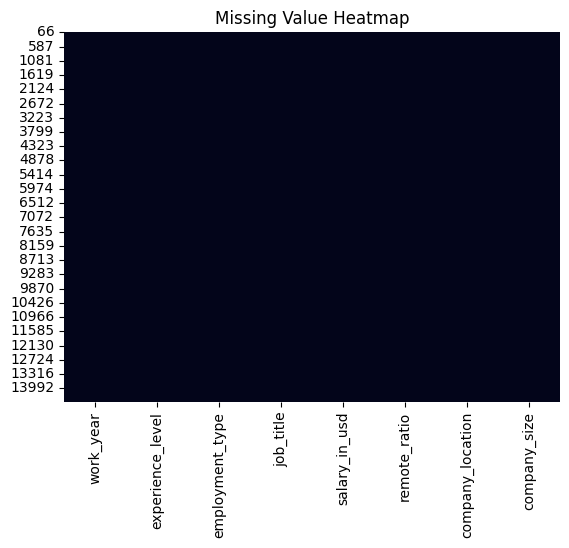

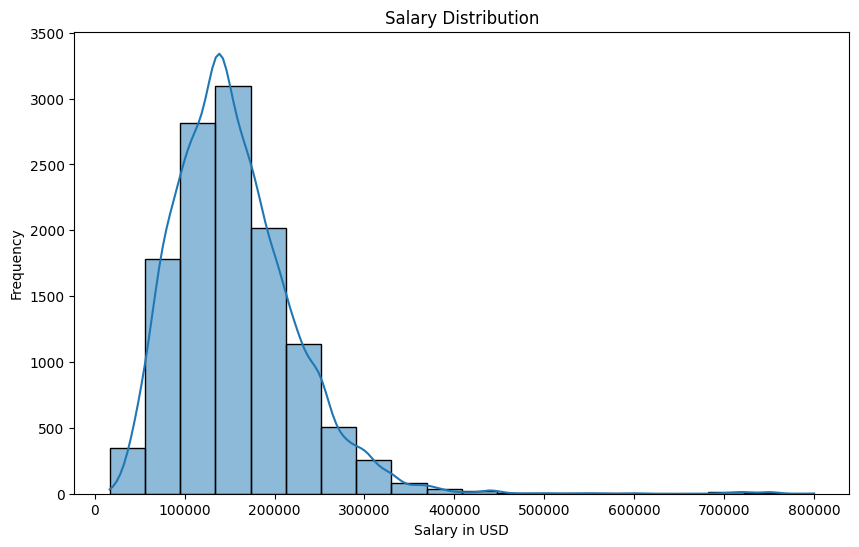

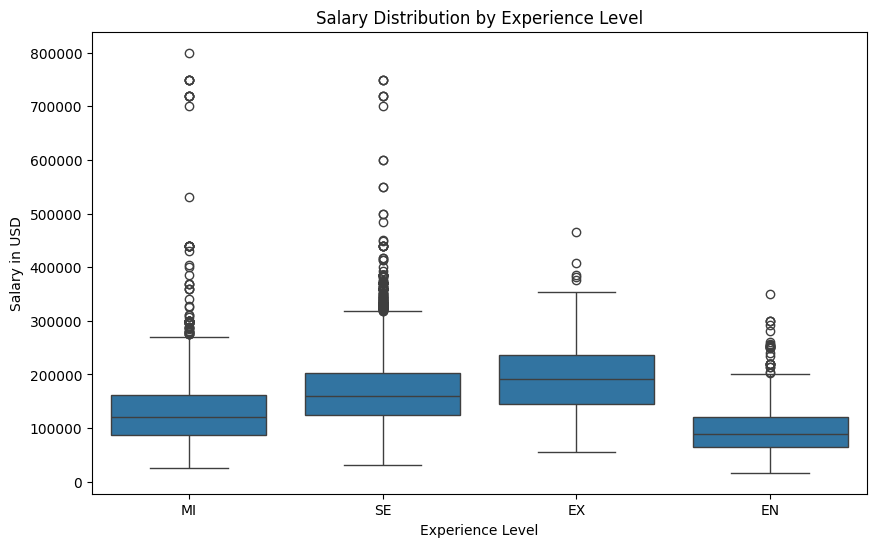

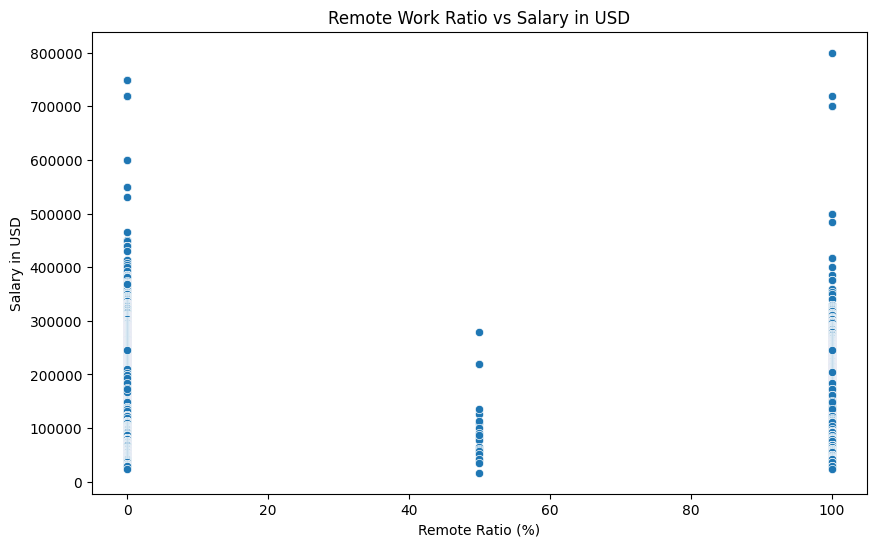

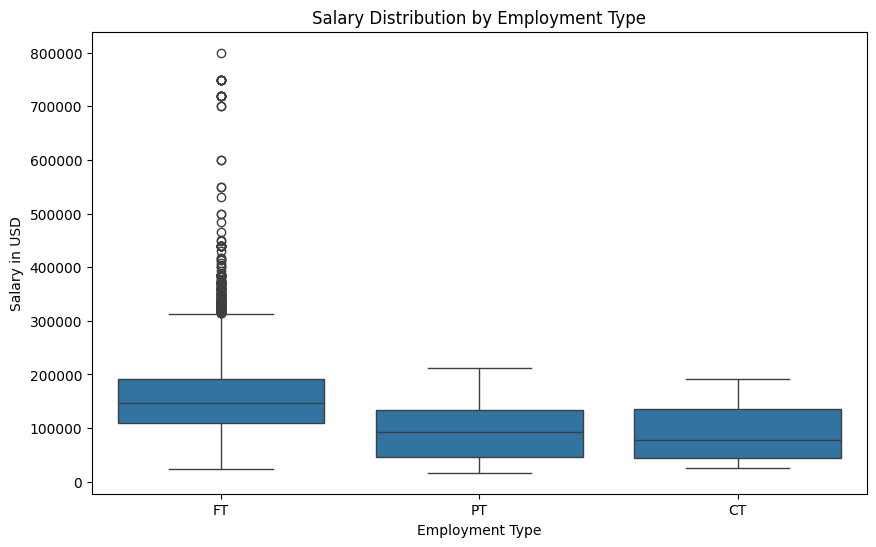

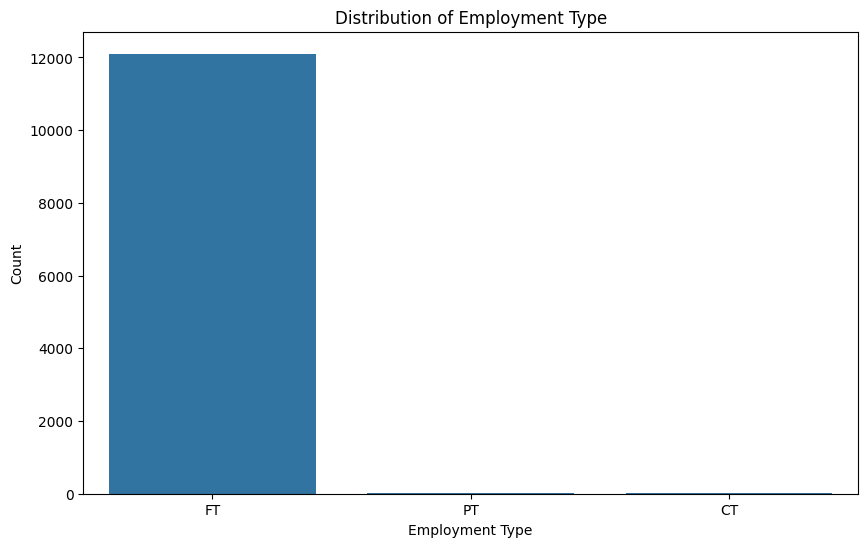

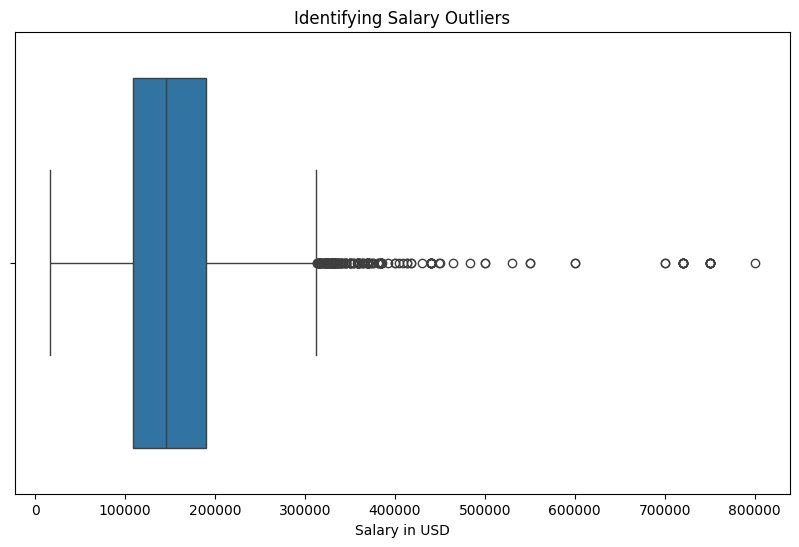

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe().round(1))

# Check for Missing Values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Value Heatmap')

## 1. Bar chart for Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

## 2. Salary Distribution by Experience Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

## 3. Remote Ratio vs Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Remote Work Ratio vs Salary in USD')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary in USD')
plt.show()

## 4. Salary Distribution by Employment Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

## 5. Explore Categorical Variables
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', data=df)
plt.title('Distribution of Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()


## 6. Identify Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary_in_usd', data=df)
plt.title('Identifying Salary Outliers')
plt.xlabel('Salary in USD')
plt.show()


In [128]:
# Transform Prediction Variable 'salary_in_usd'
df['salary_in_usd'] = df['salary_in_usd'].apply(lambda x: 1 if x > df['salary_in_usd'].median() else 0 )

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12122 entries, 66 to 14832
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         12122 non-null  int64 
 1   experience_level  12122 non-null  object
 2   employment_type   12122 non-null  object
 3   job_title         12122 non-null  object
 4   salary_in_usd     12122 non-null  int64 
 5   remote_ratio      12122 non-null  int64 
 6   company_location  12122 non-null  object
 7   company_size      12122 non-null  object
dtypes: int64(3), object(5)
memory usage: 852.3+ KB


In [130]:
# Categorical Data Transformation

# Select columns with non-numeric data types
non_numeric_cols = df.select_dtypes(exclude=['int', 'float']).columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=non_numeric_cols)

**Build a preliminary logistic regression model**

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the data
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define the logistic regression model
log_model = LogisticRegression()
# Train the model
log_model.fit(X_train, y_train)

# Evaluate the model
y_pred_log = log_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.60      0.65      1775
           1       0.66      0.76      0.71      1862

    accuracy                           0.68      3637
   macro avg       0.68      0.68      0.68      3637
weighted avg       0.68      0.68      0.68      3637

Confusion Matrix:
[[1060  715]
 [ 449 1413]]


**Build a preliminary kNN model**

In [132]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Define the kNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Print classification report, confusion matrix and ROC AUC
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("ROC AUC:")
print(roc_auc_score(y_test,y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      1775
           1       0.65      0.75      0.70      1862

    accuracy                           0.67      3637
   macro avg       0.67      0.66      0.66      3637
weighted avg       0.67      0.67      0.66      3637

Confusion Matrix:
[[1028  747]
 [ 468 1394]]
ROC AUC:
0.6639061436286894


<Axes: >

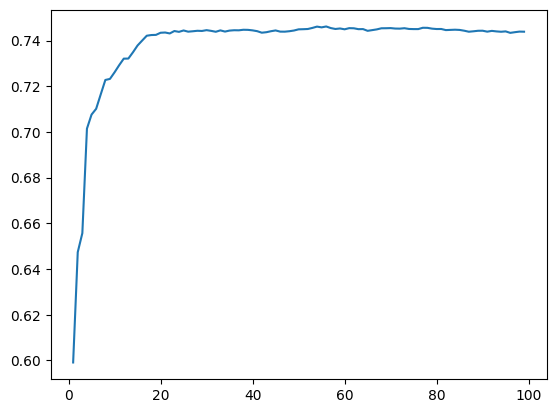

In [133]:
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

sns.lineplot(x=range(1,max_K), y=cv_scores)

In [134]:
cv_scores[10:20]

[0.7291923058937754,
 0.7320683503941513,
 0.7321029420230769,
 0.7348521728993075,
 0.7378304812372974,
 0.7399834926038378,
 0.7421012969974468,
 0.7424000081148121,
 0.7424714033831803,
 0.7433989825256953]

In [135]:
#Optimization of the kNN model

knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print('ROC AUC: ', roc_auc_score(y_test,y_pred_knn))

[[1131  644]
 [ 425 1437]]
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1775
           1       0.69      0.77      0.73      1862

    accuracy                           0.71      3637
   macro avg       0.71      0.70      0.70      3637
weighted avg       0.71      0.71      0.70      3637

ROC AUC:  0.7044669520884708


**Build a preliminary random forest model**


In [136]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define the Random Forest classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67      1775
           1       0.68      0.79      0.73      1862

    accuracy                           0.71      3637
   macro avg       0.71      0.70      0.70      3637
weighted avg       0.71      0.71      0.70      3637

Confusion Matrix:
[[1094  681]
 [ 385 1477]]


**Build a preliminary boosted tree model**

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define the Gradient Boosting classifier model
bt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1)

# Train the model
bt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_bt = bt_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_bt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bt))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      1775
           1       0.68      0.80      0.74      1862

    accuracy                           0.71      3637
   macro avg       0.71      0.70      0.70      3637
weighted avg       0.71      0.71      0.70      3637

Confusion Matrix:
[[1085  690]
 [ 375 1487]]


**Build a preliminary naive Bayes model**

In [138]:
from sklearn.naive_bayes import GaussianNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define the Naive Bayes classifier model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.35      0.50      1775
           1       0.60      0.93      0.73      1862

    accuracy                           0.65      3637
   macro avg       0.72      0.64      0.62      3637
weighted avg       0.72      0.65      0.62      3637

Confusion Matrix:
[[ 628 1147]
 [ 122 1740]]


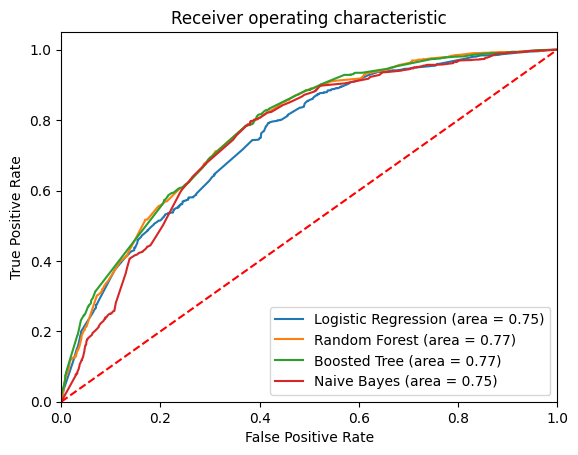

In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Logistic Regression
logit_roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1])
logit_fpr, logit_tpr, logit_thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])

# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

# Naive Bayes
nb_roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(logit_fpr, logit_tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted Tree (area = %0.2f)' % bt_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Comparison of Model Performance based on ROC AUC**

According to the dataset, the random forest and boosted tree models outperformed others in terms of ROC AUC score, both achieving a score of 0.77.